In [1]:
import pandas as pd
import acquire
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split


# Acquire

In [2]:
df = acquire.new_world_data()

In [3]:
#checking to see if data was imported properly from sql and acquire file
df.head(1)

,code,countryname,continent,region,surfacearea,countrypopulation,lifeexpectancy,gnp,cityname,citypopulation
0,ABW,Aruba,North America,Caribbean,193.0,103000,78.4,828.0,Oranjestad,29034


# Prepare

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4079 entries, 0 to 4078
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               4079 non-null   object 
 1   countryname        4079 non-null   object 
 2   continent          4079 non-null   object 
 3   region             4079 non-null   object 
 4   surfacearea        4079 non-null   float64
 5   countrypopulation  4079 non-null   int64  
 6   lifeexpectancy     4068 non-null   float64
 7   gnp                4079 non-null   float64
 8   cityname           4079 non-null   object 
 9   citypopulation     4079 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 318.8+ KB


In [5]:
df[df.lifeexpectancy.isnull()]

,code,countryname,continent,region,surfacearea,countrypopulation,lifeexpectancy,gnp,cityname,citypopulation
496,CCK,Cocos (Keeling) Islands,Oceania,Australia and New Zealand,14.0,600,NaN,0.0,Bantam,503
497,CCK,Cocos (Keeling) Islands,Oceania,Australia and New Zealand,14.0,600,NaN,0.0,West Island,167
983,CXR,Christmas Island,Oceania,Australia and New Zealand,135.0,2500,NaN,0.0,Flying Fish Cove,700
1251,FLK,Falkland Islands,South America,South America,12173.0,2000,NaN,0.0,Stanley,1636
2689,NFK,Norfolk Island,Oceania,Australia and New Zealand,36.0,2000,NaN,0.0,Kingston,800
2758,NIU,Niue,Oceania,Polynesia,260.0,2000,NaN,0.0,Alofi,682
2874,PCN,Pitcairn,Oceania,Polynesia,49.0,50,NaN,0.0,Adamstown,42
3387,SJM,Svalbard and Jan Mayen,Europe,Nordic Countries,62422.0,3200,NaN,0.0,Longyearbyen,1438
3456,TKL,Tokelau,Oceania,Polynesia,12.0,2000,NaN,0.0,Fakaofo,300
3938,VAT,Holy See (Vatican City State),Europe,Southern Europe,0.4,1000,NaN,9.0,Città del Vaticano,455


- Only null values are from life expectancy, the target variable. Null values for continent are mostly related to Oceania. Not going to impute values. Dropping rows.

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4068 entries, 0 to 4078
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               4068 non-null   object 
 1   countryname        4068 non-null   object 
 2   continent          4068 non-null   object 
 3   region             4068 non-null   object 
 4   surfacearea        4068 non-null   float64
 5   countrypopulation  4068 non-null   int64  
 6   lifeexpectancy     4068 non-null   float64
 7   gnp                4068 non-null   float64
 8   cityname           4068 non-null   object 
 9   citypopulation     4068 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 349.6+ KB


**No null values**

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lifeexpectancy', ylabel='Density'>

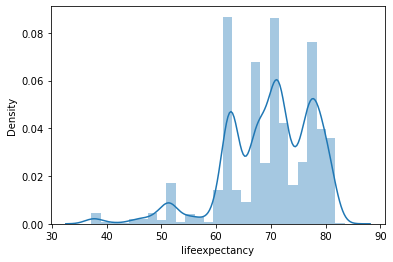

In [8]:
sns.distplot(df.lifeexpectancy)


In [9]:
# df[df.lifeexpectancy > 76]

In [10]:
# df[df.lifeexpectancy <= 76]

**Decided the split the highest life expectancy at 77. It is a minority of the world life expectancy and the U.S. life expectancy is 77.1, so I wan't to measure what factors contribute to a life expectancy below our own.**

In [11]:
>>> df['highest_life_exp']=df['lifeexpectancy'].apply(lambda x: 1 if x >= 77 else 0)


In [12]:
df.head(2)

,code,countryname,continent,region,surfacearea,countrypopulation,lifeexpectancy,gnp,cityname,citypopulation,highest_life_exp
0,ABW,Aruba,North America,Caribbean,193.0,103000,78.4,828.0,Oranjestad,29034,1
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,22720000,45.9,5976.0,Kabul,1780000,0


In [13]:
#GNP is abbreviated. After doing calculations, I need to multiply gnp by a million to get actual figure. Will use this to determine gnp per capita.
df['real_gnp'] = df.gnp * 1000000

In [14]:
df['gnp_per_capita'] = round(df.real_gnp / df.countrypopulation, 2)

In [15]:
df.head(2)

,code,countryname,continent,region,surfacearea,countrypopulation,lifeexpectancy,gnp,cityname,citypopulation,highest_life_exp,real_gnp,gnp_per_capita
0,ABW,Aruba,North America,Caribbean,193.0,103000,78.4,828.0,Oranjestad,29034,1,8.280000e+08,8038.83
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,22720000,45.9,5976.0,Kabul,1780000,0,5.976000e+09,263.03


In [16]:
df[df.countryname == 'United States'].gnp_per_capita.head(1)

3647    30574.77
Name: gnp_per_capita, dtype: float64

In [17]:
#After doing additional research, our gnp per capita was around $30k in 1996, 
# just to get an idea of how up to date this data is.

In [18]:
#Creating a column to determine how densly populated each country is to determine if that factors into life expectancy.
df['population_density'] = df.countrypopulation / df.surfacearea

In [19]:
df.head(2)

,code,countryname,continent,region,surfacearea,countrypopulation,lifeexpectancy,gnp,cityname,citypopulation,highest_life_exp,real_gnp,gnp_per_capita,population_density
0,ABW,Aruba,North America,Caribbean,193.0,103000,78.4,828.0,Oranjestad,29034,1,8.280000e+08,8038.83,533.678756
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,22720000,45.9,5976.0,Kabul,1780000,0,5.976000e+09,263.03,34.841816


# Explore

In [20]:
#Splitting data for exploration and modeling
train_and_validate, test = train_test_split(df, random_state=123)
train, validate = train_test_split(train_and_validate, random_state=123)

In [21]:
train.shape, validate.shape, test.shape

((2288, 14), (763, 14), (1017, 14))

**Going to perform various aggregations and visualizations for exploration purposes**

In [26]:
df.groupby(['continent']).lifeexpectancy.mean().sort_values(ascending=False)

continent
North America    74.913425
Oceania          73.851064
Europe           73.637545
Asia             69.518403
South America    67.464392
Africa           54.389344
Name: lifeexpectancy, dtype: float64

In [22]:
df.groupby(['continent', 'region']).lifeexpectancy.mean().sort_values(ascending=False)

continent      region                   
Oceania        Australia and New Zealand    79.017391
Europe         Nordic Countries             78.517647
               Southern Europe              78.074839
               Western Europe               77.953226
               British Islands              77.678313
North America  North America                77.417431
Asia           Eastern Asia                 75.102162
North America  Caribbean                    72.998276
Oceania        Polynesia                    71.787500
North America  Central America              71.302551
Asia           Middle East                  70.271839
Europe         Baltic Countries             68.970000
               Eastern Europe               68.394609
Oceania        Micronesia                   67.600000
South America  South America                67.464392
Oceania        Melanesia                    67.140000
Asia           Southeast Asia               67.124579
Africa         Northern Africa           

In [27]:
#Western countries have the highest life expectancy on average. North America as a whole has a slightly lower avg than the region of NA due to Central America. Also for Europe, 
#their average is pulled down by the Baltic and Eastern European countries.

# Visualizations

Text(0.5, 0, 'Highest Life Expectancy')

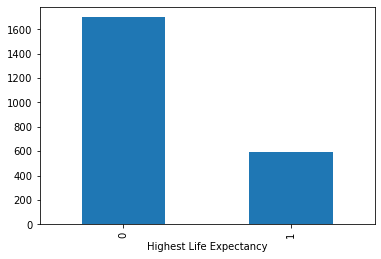

In [51]:
train.highest_life_exp.value_counts().plot.bar()
plt.xlabel('Highest Life Expectancy')

<AxesSubplot:xlabel='gnp', ylabel='lifeexpectancy'>

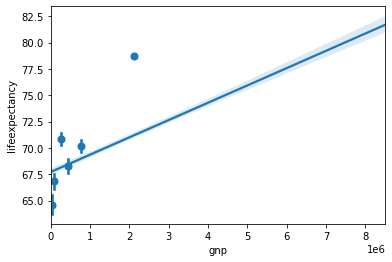

In [53]:
sns.regplot(data=train, x="gnp", y="lifeexpectancy", x_bins=6)

<AxesSubplot:xlabel='gnp_per_capita', ylabel='lifeexpectancy'>

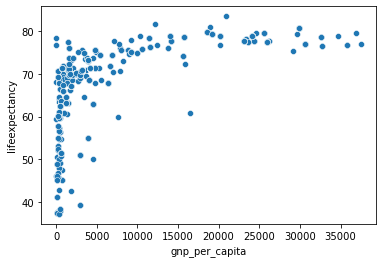

In [47]:
sns.scatterplot(data=train, x="gnp_per_capita", y="lifeexpectancy", x_bins=6)

<AxesSubplot:xlabel='population_density', ylabel='lifeexpectancy'>

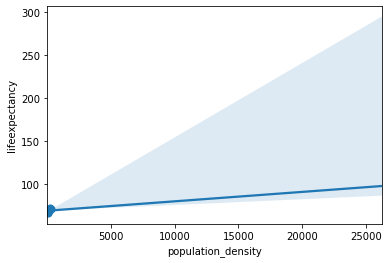

In [33]:
sns.regplot(data=train, x="population_density", y="lifeexpectancy", x_bins=6)

<AxesSubplot:xlabel='countrypopulation', ylabel='lifeexpectancy'>

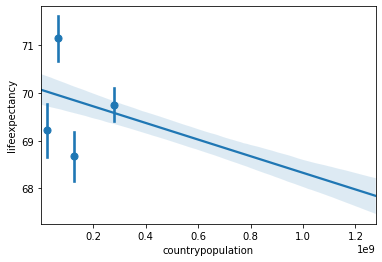

In [38]:
sns.regplot(data=df, x="countrypopulation", y="lifeexpectancy", x_bins=4)

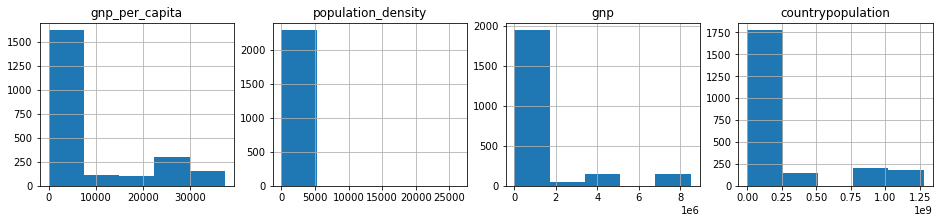

In [41]:
plt.figure(figsize=(16, 3))

for i, col in enumerate(['gnp_per_capita', 'population_density', 'gnp', 'countrypopulation']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = train[col]  
    plt.subplot(1,4, plot_number)
    plt.title(col)
    series.hist(bins=5)

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


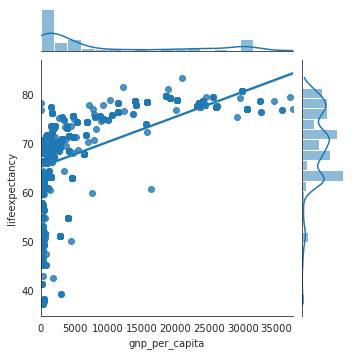

In [42]:
with sns.axes_style('white'):
    j = sns.jointplot("gnp_per_capita", "lifeexpectancy", data=train, kind='reg', height=5);
plt.show()

In [58]:
train= train[['lifeexpectancy', 'highest_life_exp', 'gnp_per_capita', 'population_density', 'countrypopulation', 'gnp', 'citypopulation' ]]

<AxesSubplot:>

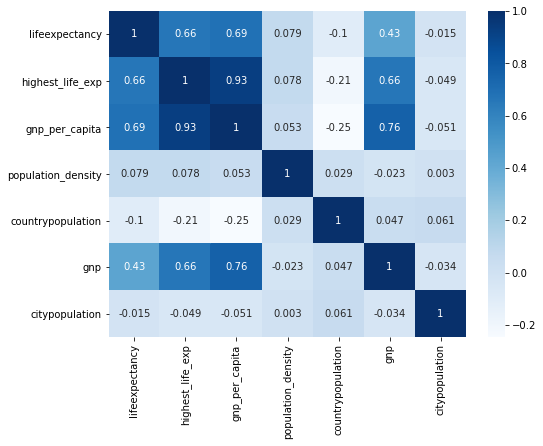

In [61]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(), cmap='Blues', annot=True)
